In [1]:
#p181 연습
# 아래는 직원들의 체질검사 데이터이다. 예측 모델을 이용하여 얻은 예측값으로 MSE, RMSE, MAE 그리고 MAPE를 계산하시오.
# 데이터 : 체질검사.csv (변수 : 15, 자료 수 : 252개)

# 1. 데이터 구성하기
# 2. 예측 모델 생성(회귀분석, 의사결정나무, 랜덤 포레스트, 그레디언트 부스팅)
# 3. 예측 및 평가
# 4. 시각화

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt # 데이터 시각화
import matplotlib

from sklearn.model_selection import train_test_split # 데이터 분할 train, test
import statsmodels.formula.api as smf # 회귀분석
from sklearn.tree import DecisionTreeRegressor # 의사결정계수
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트
from sklearn.ensemble import GradientBoostingRegressor # 그레디언트 부스트

# 평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.tree import export_graphviz
import graphviz

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [100]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/체질검사.csv", encoding = 'euc-kr')
df_raw.head()
# 몸무게와 키가 단위와 같이 들어있음.

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [4]:
#p183 연습
# 단위와 같이 표현되어 있는 수치형 변수 처리

# str.split(exapnd = True) 하나의 columns를 여러개로 나누기
# split을 한 후 인덱싱을 통해 숫자값을 추출할 수 있지만, split의 매개변수인 expand를 사용하면 하나의 컬럼을 분리할 수 있다.
# expand 매개변수를 사용하면 하나의 컬럼을 두 개의 컬럼으로 분리할 수 있다.

df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand = True)
# 데이터프레임 WEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(WEIGHT과 WEIGHT_UNIT 으로)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand = True)
# 데이터프레임 HEIGHT의 문장을 분리하고 두 개의 컬럼으로 분리한다.(HEIGHT과 HEIGHT_UNIT 으로)

df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
# WEIGHT은 숫자+단위로 되어 있기 때문에 아마 문장이었을 것이다.
# 이제 숫자와 문자 컬럼을 분리했지만 아직 문자기 때문에 직접 실수형으로 타입을 변경해서 값을 저장한다.
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
# astype()을 사용한 데이터형 dtype 변환
# float64 실수형 배 정밀도 부동소수점형

df_raw.info()
# 정보 확인하기 / 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형
# WEIGHT과 HEIGHT이 float64가 된 것을 확인할 수 있다.
# 그리고 분리된 WEIGHT_UNIT, HEIGHT_UNIT은 문장임을 확인할 수 잇다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [5]:
#p183 연습
# 단위를 나타내는 항목 제외
df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis = 1)
# axis = 0은 행
# axis = 1은 열

# 행/열 삭제 drop
# drop 메서드는 데이터프레임에서 열을 삭제하는 메서드이다.

In [101]:
#p183 연습
# 범주형 변수의 Dummy 변수화
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

# 머신러닝 할 때 기계가 이해할 수 있도록 모든 데이터를 수치로 변환해주는 전처리 작업이 필수적이다.
# 숫자가 아닌 objcet형의 데이터들이 있다면
# 1. 먼저 수치형 데이터로 변환을 해주고 (0, 1, 2, 3..)
# 2. 그다음 수치화된 데이터를 가변수화하여 나타내 준다면
# -> 기계학습에 적합한 데이터의 형태로 가공된다.
# 그런데 왜 수치형 데이터로만 바꾸면 될텐데 굳이 더미로 가변수화 해야하는 걸까?
# 왜냐하면 수치형 데이터로만 변환을 하게 되면 서로 간의 관계성이 생기게 된다.
# 따라서 서로 무관한 수, 즉 더미로 만든 가변수로 변환함으로서 그러한 문제를 막아준다.
# pandas에서는 손쉽게 더미의 가변수를 만들 수 있도록 get_dummies 함수를 제공
# dummy = True : NAN을 생성하여 결측값도 인코딩하여 처리

# 더미를 만들 건데 데이터프레임을 결측값을 처리하여 더미값을 만들어낸다.

# 밑에 결과를 보면 GENDER가 object형인데 더미값으로 수치화된 데이터로 변환된 것을 확인할 수 있다.

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,...,HEIGHT_74.5 inch,HEIGHT_74.75 inch,HEIGHT_75 inch,HEIGHT_75.25 inch,HEIGHT_75.5 inch,HEIGHT_76 inch,HEIGHT_77.5 inch,HEIGHT_77.75 inch,GENDER_남성,GENDER_여성
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,...,0,0,0,0,0,0,0,0,1,0
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,...,0,0,0,0,0,0,0,0,1,0
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,...,0,0,0,0,0,0,0,0,1,0
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,...,0,0,0,0,0,0,0,0,0,1
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,...,0,0,0,0,0,0,0,0,0,1


In [125]:
#p183 연습
# 목표변수, 설명변수 데이터 지정

df_raw_y = df_raw_dummy["FAT"] # FAT열을 df_rwa_y에 저장 swap처럼
df_raw_x = df_raw_dummy.drop("FAT", axis = 1, inplace = False)
 # FAT열 제거 하고 열을 저장 안한다.
# inplace = False 저장안함                                  
# inplace = true 저장함

# train_test_split(X: 설명변수 데이터, Y : 목표변수 데이터, test_size = test 데이터 비율, random_state : random seed)
df_train, df_test = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                                , test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 258)
train data Y size : (176,)
test data X size : (76, 258)
test data Y size : (76,)


In [126]:
#p184 연습
# 예측 모델 생성
# - 모델별 변수 및 파라미터는 교육과정에서 최종 선정된 결과를 활용

# 회귀모델
lr_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     98.98
Date:                Thu, 08 Aug 2024   Prob (F-statistic):           1.75e-48
Time:                        01:37:49   Log-Likelihood:                -504.06
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     170   BIC:                             1039.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8986      7.033     -0.270      0.7

In [127]:
#p184 연습
# 의사결정 계수
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4 )
dt_model.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

In [128]:
#p184 연습
# 랜덤 포레스트
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6,
                                 min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

In [129]:
#p184 연습
# 그래디언트 부스트
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, 
                                     min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [130]:
#p185 연습
# 예측 및 평가

# 모델 리스트, 그래프를 그리기 생성 목적
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]

# 평가 리스트 초기화
mse, rmse, mae, mape = [],[],[],[]

In [131]:
#p185 연습
# 회귀분석
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['FAT'], lr_y_pred))
rmse.append(mean_squared_error(df_test_y, lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['FAT'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], lr_y_pred))

In [132]:
#p186 연습
# 의사결정나무
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [133]:
#p186 연습
# 랜덤포레스트
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [134]:
#p187 연습
# 그래디언트 부스팅
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

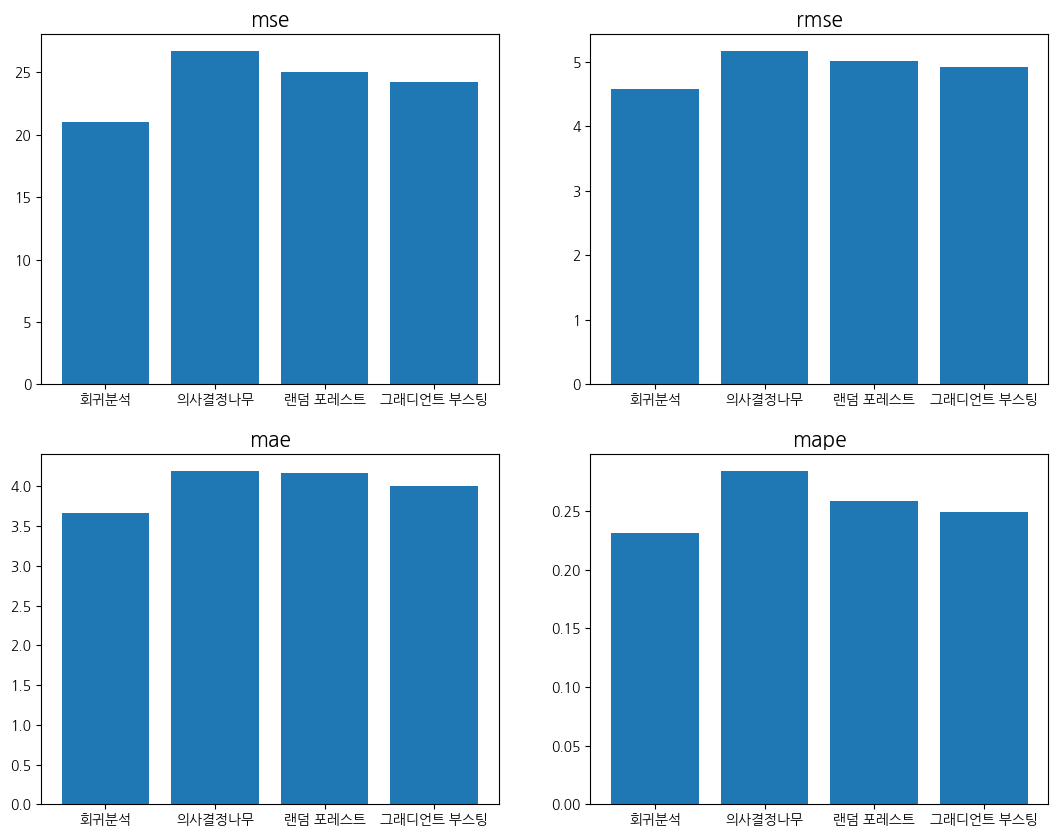

In [135]:
# p188 연습
# 시각화 - 평가
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

In [ ]:
# p189 실습
# 아래는 당뇨병 발병 원인과 관련된 데이터이다. 예측 모델을 이용하여 얻은 예측값으로 MSE, RMSE, MAE 그리고 MAPEFMF를 계산하시오.
# 데이터 : DIABETES.csv (변수 : 11, 자료 수 : 443개)

# 1. 데이터 구성하기
# 2. 에측 모델 생성(회귀분석, 의사결정나무, 랜덤 포레스트, 그래디언트 부스팅)
# 3. 예측 및 평가
# 4. 시각화



In [137]:
 # p207 연습
# 아래는 직원들의 직무능력평가 데이터이다. 차원 축소 및 주성분 탐색을 위해 주성분 분석을 실시하고 결과를 해석하시오.
# 데이터 : 직무능력평가.csv (변수 : 7개, 자료 수 : 30개)

# 1. 데이터 구성하기
# 2. 선형관계 확인 : 산점도 행렬, 상관계수
# 3. 데이터 확인 및 Scaling
# 4. 주성분 분석 및 결과 : 주성분 점수, 고유벡터, 기여율, 해석 등
# 5. 주성분 상관/회귀분석

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt 
import seaborn as sns # 데이터 시각화 : 추세, 산점도 행렬

from sklearn.preprocessing import StandardScaler # Scale 변환 : 평균, 표준편차 기준

from sklearn.decomposition import PCA # 주성분 분석

import statsmodels.api as sm # 회귀분석

%matplotlib inline

In [34]:
# 한글 폰트
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [35]:
# p209 연습
# 데이터 구성하기

df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [45]:
# 데이터 분리(Y, Xs) -> 설명변수를 이용한 주성분 분석

df_raw_x = df_raw.drop("EVAL", axis = 1)
df_raw_y = df_raw["EVAL"]
df_raw_y.head()

# 주성분 회귀분석의 목표변수
# df_raw_y = 주성분 회귀분석의 목표변수
# df_raw_x = 주성분 분석 입력변수

0    43
1    63
2    71
3    61
4    81
Name: EVAL, dtype: int64

In [46]:
df_raw_x.head()
# 주성분 분석 입력변수

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


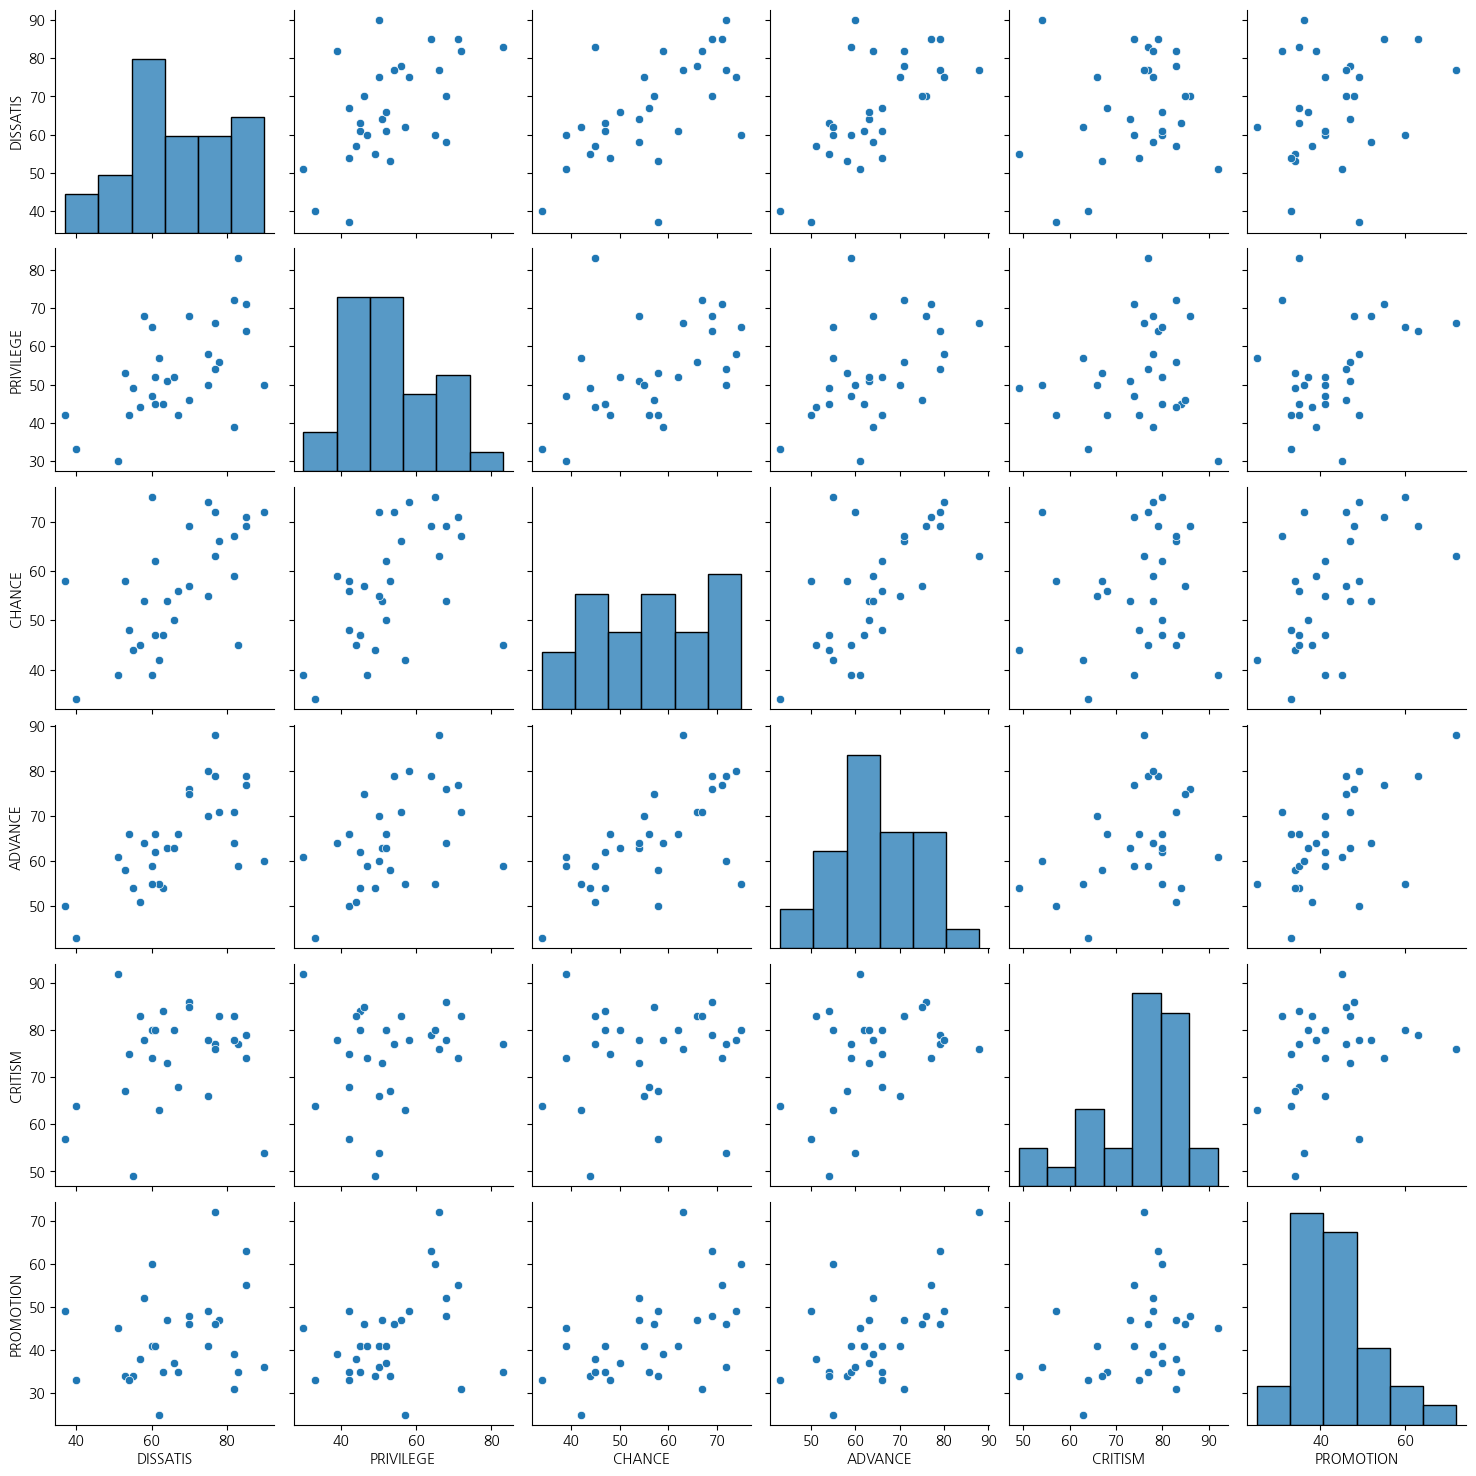

In [47]:
# 산점도 행렬
sns.pairplot(df_raw_x)

In [48]:
# Pearson 상관계수 : pearson, kendall, spearman
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [49]:
# DISSATIS는 CHANCE(0.597), ADVANCE(0.669)와 상관관계가 높음
# CHANCE는 ADVANCE(0.640)와 상관관계가 높음

In [50]:
# p211 연습
# 데이터 확인 및 Scaling 변환 필요 확인
df_raw_x.describe().round(3)


,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [51]:
# p211 연습
# 변수 이름 저장
x_cols = df_raw_x.columns

# Scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape :\n {}".format(nd_scaled.shape))

Scaled Data :
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape :
 (30, 6)


In [52]:
# p211 연습
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [53]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [55]:
# p212 연습
# 주성분 분석

# 주성분 분석 : 주성분1(Prin1) ~ 주성분6(Prin6) 생성 및 저장
pca = PCA(n_components = 6)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data :\n{}".format(nd_pca[:5]))
# 생성된 주성분 점수 Row, Column 개수 확인
print("Shape :\n {}".format(nd_pca.shape))


PCA Data :
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape :
 (30, 6)


In [56]:
# p212 연습
# 주성분 분석 및 결과 : 주성분 점수
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])

# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [57]:
# p213 연습
# 주성분 분석 및 결과 : 고유값(Eigenvalue) 확인 및 주성분 개수 결정

# 주성분 분석 통계량 저장 : 주성분 번호, Eigenvalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [I for I in range(1, 7)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

# 적정 주성분 선택
# : 상관계수 기준(고유값 > 1) 2개
# : 공분산 기준(고유값 누적비율 > 0.8) 3개

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


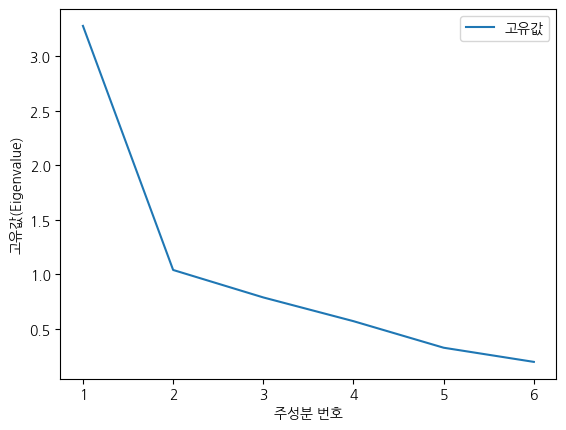

In [58]:
# p214 연습
# 주성분 분석 및 결과 : Scree Plot 확인 및 주성분 개수 결정

# Scree Plot
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "고유값")

# 그래프 label, legend 설정
plt.ylabel("고유값(Eigenvalue)")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

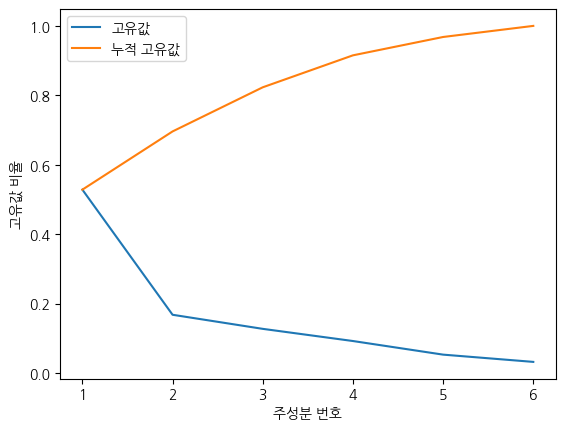

In [59]:
# p214 연습
#고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["EigenValueRatio"], label = "고유값")

plt.plot(df_pca_stat["PrinNo"],
        df_pca_stat["CumEigenValueRatio"], label="누적 고유값")
plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [61]:
# p215 연습
# 주성분 분석 및 결과 : 고유 벡터(Eigenvector) 확인 및 해석

# 주성분 분석 데이터의 변수 이름
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

# 주성분 Prin 1 ~ 6까지의 고유벡터 저장
# 전치 결과 pd.DataFrame(pca.components_, columns = ["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])], axis = 1)
# 파이썬 PCA 분석 시 SVD 연산 방식의 차이 반영(전치)
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T,
                columns = ["Prin1", "Prin2", "Prin3", "Prin4", "Prin5", "Prin6"])], axis = 1)
df_eigenvector.round(3)

# 고유값 확인 및 주성분 해석
# : 1주성분은 배움 기회와 승진 간의 음의 연관성
# : 2주성분은 불만처리와 특권 허용 간의 양의 연관성 확인
# 분석가에 따라 다른 그룹 생성 및 해석 가능

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,-0.439,0.313,-0.445,-0.316,0.192,0.612
1,PRIVILEGE,-0.395,0.309,-0.217,0.815,0.038,-0.190
2,CHANCE,-0.461,0.217,0.272,-0.225,-0.776,-0.118
3,ADVANCE,-0.493,-0.116,-0.006,-0.365,0.460,-0.631
4,CRITISM,-0.225,-0.802,-0.457,0.100,-0.289,0.058
5,PROMOTION,-0.381,-0.321,0.687,0.206,0.255,0.416


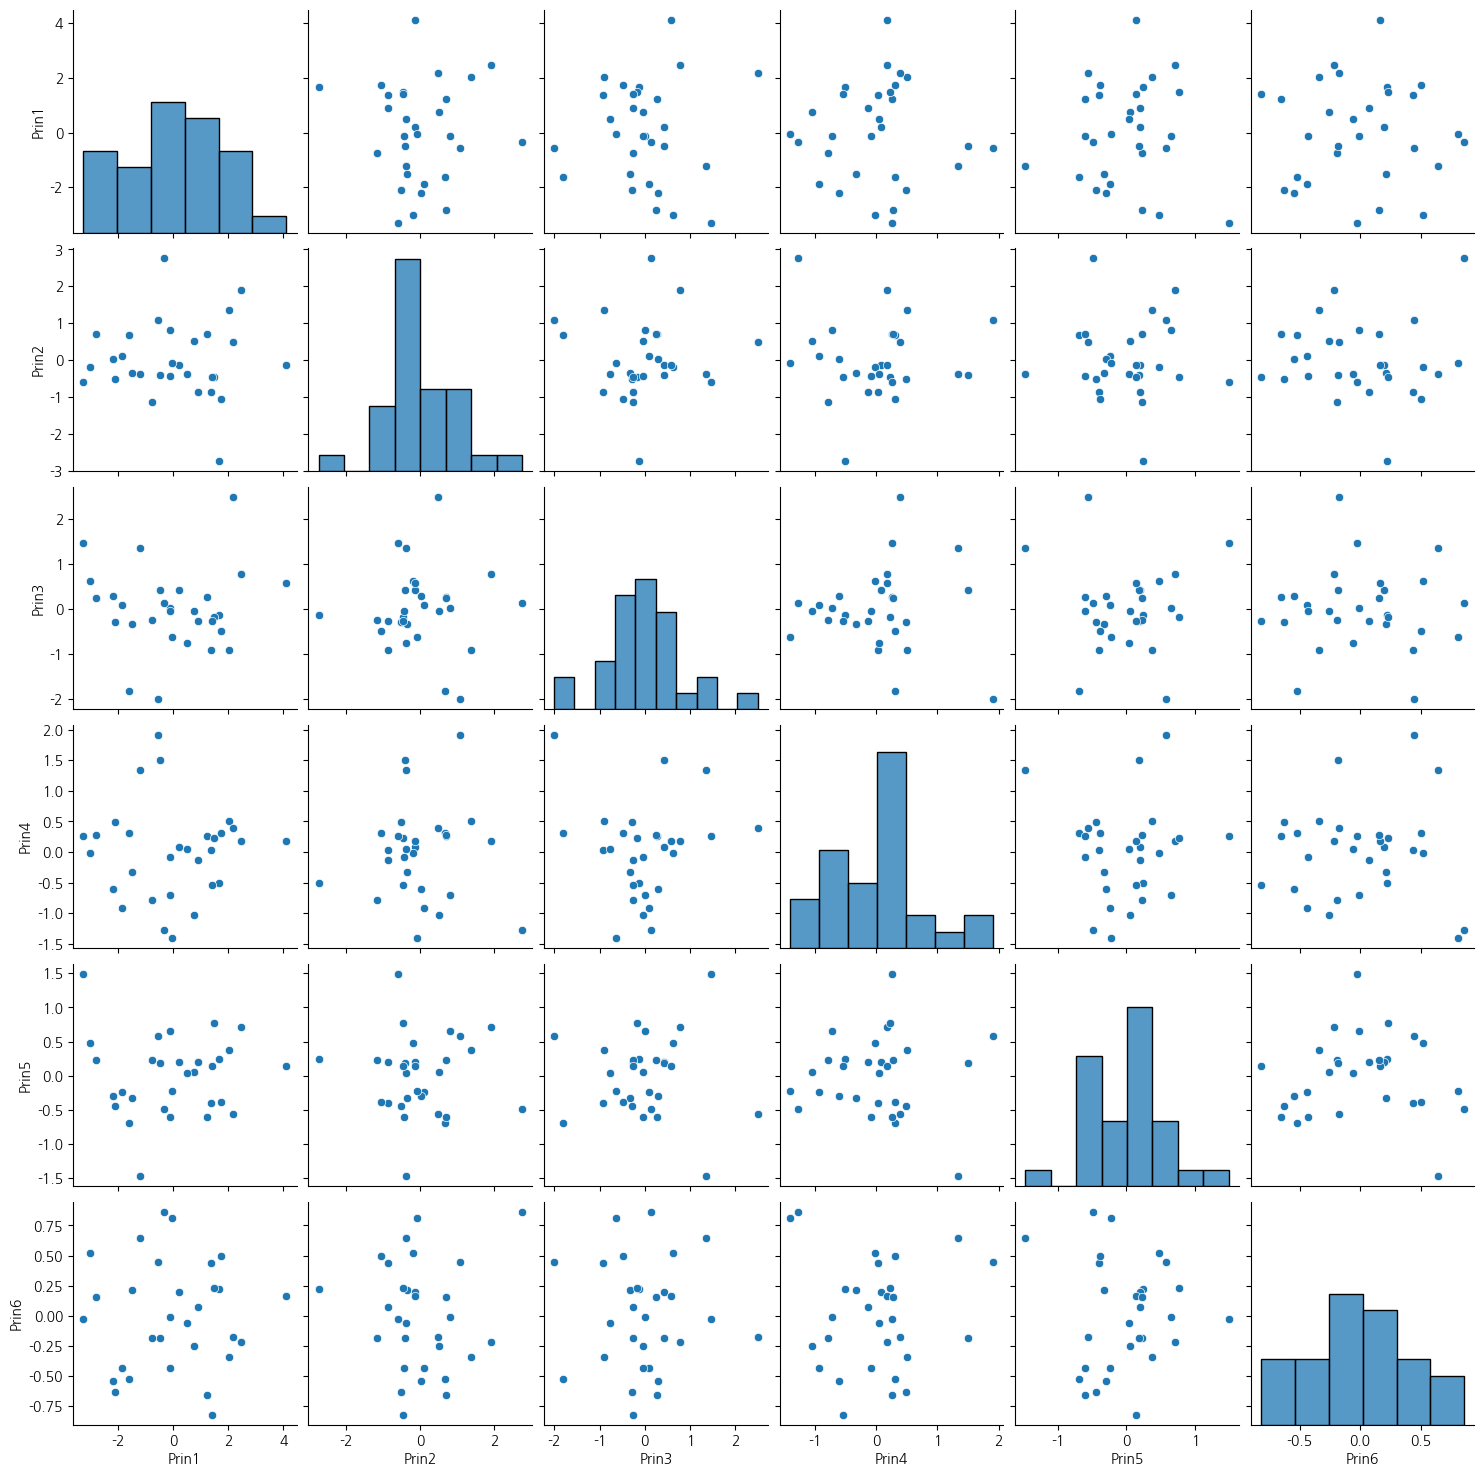

In [62]:
# p216 연습
# 주성분 상관 / 회귀분석 : 상관관계

# 산점도 행렬
sns.pairplot(df_pca)

In [64]:
# 상관계수
df_pca.corr().round(3)

# 주성분은 서로 독립적, 상관계수 = 0

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [139]:
# p217 연습
# 연습 : 주성분 상관 / 회귀분석 : 회귀분석
# 다중선형 회귀분석 : 원척 데이터 활용

# 원천 데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_raw_x_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     2.104
Date:                Thu, 08 Aug 2024   Prob (F-statistic):              0.127
Time:                        02:06:05   Log-Likelihood:                -366.63
No. Observations:                 252   AIC:                             1221.
Df Residuals:                       8   BIC:                             2082.
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -86.2028    122.56

In [66]:
# *참조 : Scale 변환 데이터를 이용한 회귀분석
# 다중선형 회귀분석 : Scale 변환 데이터 활용
# Scale 변환 데이터에 절편(const) 컬럼 추가
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.24e-05
Time:                        20:08:31   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [68]:
# 다중선형 주성분 회귀분석 : 주성분 점수(score) 데이터 활용
# Eigenvalue, Scree plot 기준으로 적정 주성분 선택
x_var = ["Prin1", "Prin2", "Prin3"]

# 선택된 주성분 점수 데이터에 절편(const) 컬럼 추가
df_pca_const = sm.add_constant(df_pca[x_var])

# 회귀모델 생성
reg_model = sm.OLS(df_raw_y, df_pca_const)

# 회귀모델 적합
reg_model = reg_model.fit()

# 모델 성능 확인
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.02e-05
Time:                        20:14:48   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [ ]:
# p218 연습
# 전체 설명변수를 이용한 모델보다 3개 주성분을 이용한 회귀모델의 설명력이 약 11% 저하됨
# - 기여율이 약한 주성분 3개(주성분 4~6)를 제외하며 설명력 저하됨
# 주성분 회귀분석의 회귀계수는 모두 유의함

In [ ]:
# p219 실습
# 아래는 붓꽃의 품종 특성 데이터이다. 꽃잎 및 꽃받침 길이와 넓이 자료를 이용해서 주성분 분석을 실시하고 결과를 해석하시오.
# 데이터 : IRIS.csv (변수 : 5개, 자료 수 : 150개)

# 1 . 데이터 구성하기
# 2. 선형관계 확인 : 산점도 행렬, 상관계수
# 3. 데이터 확인 및 Scaling
# 4. 주성분 분석 및 결과 : 주성분 점수, 고유벡터, 기여율 등
# 5. 주성분 상관분석
# 6. 주성분 결과 탐색 : 품종별 입력 / 주성분 변수 분포 (산점도 등)


In [70]:
# p232 연습
# 아래는 중국 위엔화(CNY), 일본 엔화(JPY), 그리고 미국 달러(USD)의 환율 데이터이다. 중국 위엔화(CNY)의 변화 추세를 확인하고 시계열 분석을 이용하여 미래의 위엔화 환율을 예측하시오.
#데이터 : 환율.csv (변수 : 4개, 자료 수 : 273개, 기간 : 20160101 ~ 20160331)

# 1. 데이터 구성하기
# 2. 변동 추세 확인
# 3. 시계열 분석 - 정상성 확인 / 자기상관성 확인
# 4. 예측 및 결과 해석

!pip install pmdarima # auto arima 실행을 위한 pmdarima 패키지 설치

import pandas as pd # 데이터 구성 : Series, DataFrame
import numpy as np # 행렬 연산
import matplotlib # 데이터 시각화
import matplotlib.pyplot as plt

from datetime import datetime # 날짜 데이터 생성

import statsmodels.api as sm # 선형 회귀분석 (절편(intercept) 추가)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # 자기상관 함수, 부분 자기상관 함수

from statsmodels.tsa.arima.model import ARIMA # ARIMA

from pmdarima import auto_arima # auto_arima

import warnings # 폰트체크 경고 무시
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.8 MB/s eta 0:00:00


In [71]:
# 한글폰트
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False
# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [72]:
# p234 연습
# 데이터 구성하기

# 파일명, 변수, 값 등에 한글 포함시 encoding="euc-kr" 지정, parse_dates : 날짜 변수 식별
df_raw = pd.read_csv("/home/piai/다운로드/2주차 실습파일/2. Big Data 분석/환율.csv", parse_dates = ["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


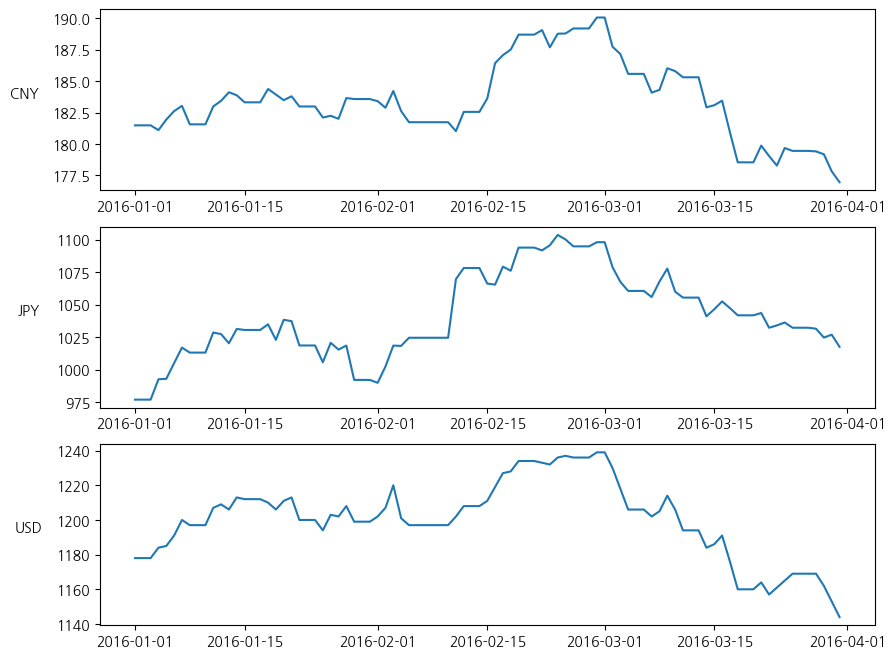

In [77]:
# p235 연습
# 변동 추세 확인 - 시간에 따른 환율 추세 그래프 생성

# 중국 위엔화와 엔화 / 달러 단위 크기가 다르기 때문에 각각 그래프를 생성 -> 3행 1열, 크기 : (10, 8)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10, 8))

# zip 함수를 사용하면 zip 함수 안의 리스트들을 하나씩 출력
# 1번 loop : ax1, 31,, "CNY"
# 2번 loop : ax2, 312, "JPY"
# 3번 loop : ax3, 313, "USD":
for (ax, idx, currency) in zip([ax1, ax2, ax3], [311, 312, 313], ["CNY", "JPY", "USD"]):
    # plot 추가, 311 -> 3행 1열의 1번 그래프
    ax.plot("APPL_DATE", "STD_RATE", data = df_raw[df_raw["CURRENCY"] == currency])
    # y축에 통화 표시 rotation : label 가로로 생성, labelpad : label과 그래프 사이의 거리
    ax.set_ylabel(currency, rotation = 0, labelpad = 20)

In [78]:
# p236 연습
# 시계열 분석 : 데이터 분할 - 통화별 데이터 분할

# CNY 데이터 선택 후 APPL_DATE를 index로 설정
df_CNY = df_raw[df_raw["CURRENCY"] == "CNY"].set_index("APPL_DATE")

# drop method를 이용하여 통화(CURRENCY)와 미달러 환산율(USD_CONV_DATE) 변수 제외
df_CNY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# JPY 데이터 생성
df_JPY = df_raw[df_raw["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)

# USD 데이터 생성 : 실습용 데이터
df_USD = df_raw[df_raw["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_USD.drop(["CURRENCY", "USD_CONV_DATE"], axis = 1, inplace = True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [79]:
# p237 연습
# 시계열 분석 : 데이터 분할 - train / test 데이터 분할

# train & test 데이터 분할 : 비율 기준 mask 지정
train_size = 0.9
len_idx = len(df_CNY.index)
mask = (np.arange(len_idx) / len_idx) < train_size
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [81]:
# P237 연습
# mask를 이용한 데이터 분할
df_CNY_train = df_CNY[mask]
df_CNY_test = df_CNY[~mask]

print("shape of train data: {}".format(df_CNY_train.shape))
print("shape of test data: {}".format(df_CNY_test.shape))

shape of train data: (82, 1)
shape of test data: (9, 1)


In [84]:
# p237 연습

# 추가 설명 : train & test 데이터 분할 : index 직접 지정
df_CNY_train = df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test = df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<Axes: xlabel='APPL_DATE'>

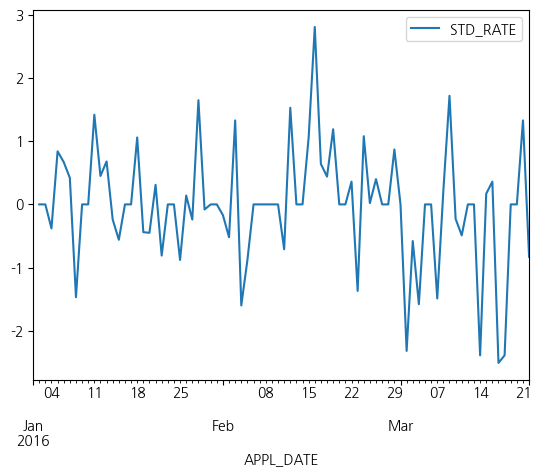

In [85]:
# p238 연습
# 시계열 분석 : 데이터 분할 - 차분을 통하여 정상성 데이터로 변환

# 1차 차분 : Z(t) - Z(t-1)
# shift(n) : 앞의 n번 쨰 행의 데이터를 가져옴 
df_CNY_diff1 = df_CNY_train - df_CNY_train.shift(1)
df_CNY_diff1.plot()

<Axes: xlabel='APPL_DATE'>

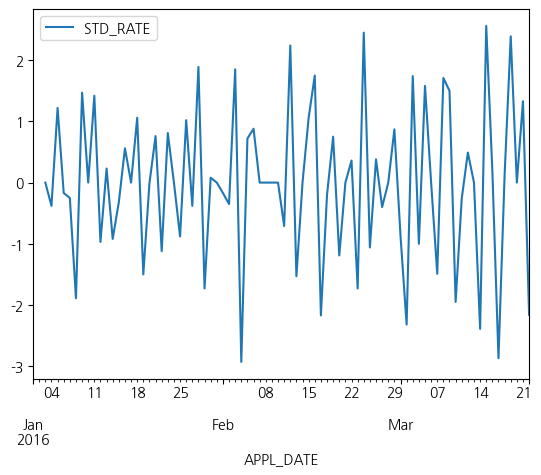

In [86]:
# p238 연습
# 2차 차분 : (z(t) - z(t-1)) - (z(t-1) - z(t-2)) = z(t) - 2*z(t-1) + z(t-2)
df_CNY_diff2 = df_CNY_train - 2 * (df_CNY_train.shift(1)) + (df_CNY_train.shift(2))
df_CNY_diff2.plot()

In [87]:
# [1차 차분] = 원 데이터보다는 시간의 흐름에 영향을 덜 받지만 정상성이 만족스럽지 않음
# [2차 차분] = 으로 시간에 따른 경향성을 가지지 않는 정상성을 만족

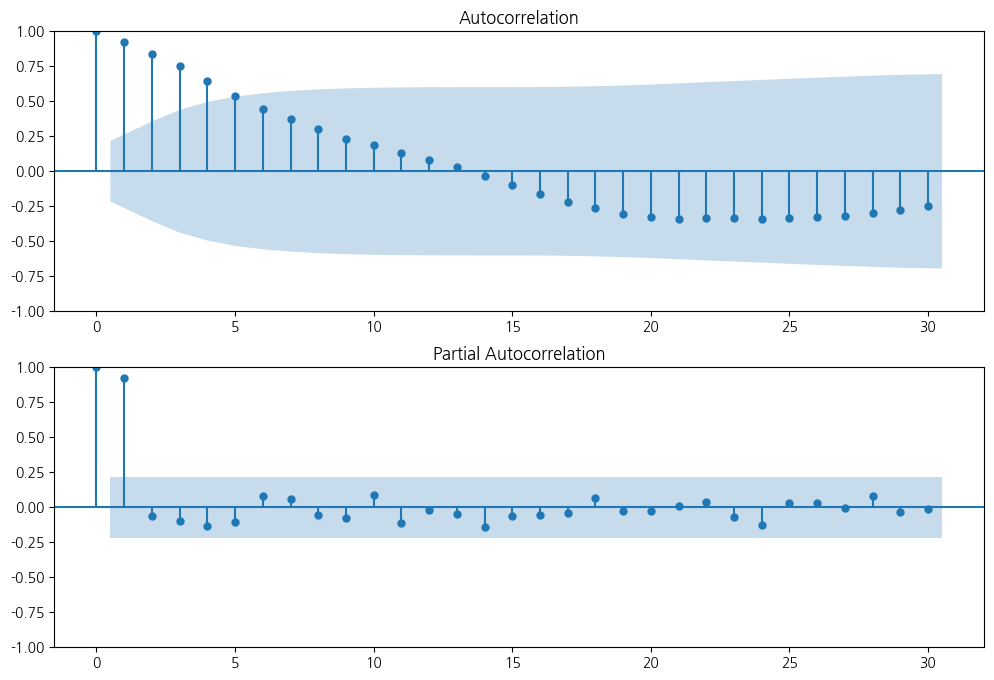

In [88]:
# p239 연습
# 시계열 분석 - 자기상관 함수 및 부분 자기상관 함수
# -> Lag를 30까지 하여 ACF, PACF 산출

# 자기회귀 최대 p기간 지정
lag_size = 30
fig = plt.figure(figsize = (12, 8))

# acf 그래프를 그릴 공간 생성
ax1 = fig.add_subplot(211)

# 자기상관 함수 그래프 plot_acf 함수 사용
fig = plot_acf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax1)

# pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)

# 부분 자기상관 함수 그래프 plot_pacf 함수 사용
fig = plot_pacf(df_CNY_train["STD_RATE"], lags=lag_size, ax=ax2)

# ACF는 지속적으로 감소하고 p=13 시점에서 양에서 음으로 변하고, PACF는 p=1 시점에서 0.9보다 크고 이후 급격히 감소(절단면)함.
# 따라서 p = 1, q = 0 모델이 적당하다고 판단 -> ARMA(1, 0)

In [89]:
# P240 연습
# 시계열 분석 - 시계열 모델

# Train 데이터 이용. AR(1), I(2, 차분), MA(0)인 ARIMA 모델
ts_model_cny = ARIMA(df_CNY_train, order = (1, 2, 0)) # (p, d, q) 지정

ts_result_cny = ts_model_cny.fit() # 데이터 적합
print(ts_result_cny.summary())

# ARIMA(1, 2, 0) 모델의 계수 유의성 확인

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 07 Aug 2024   AIC                            251.025
Time:                        22:08:55   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

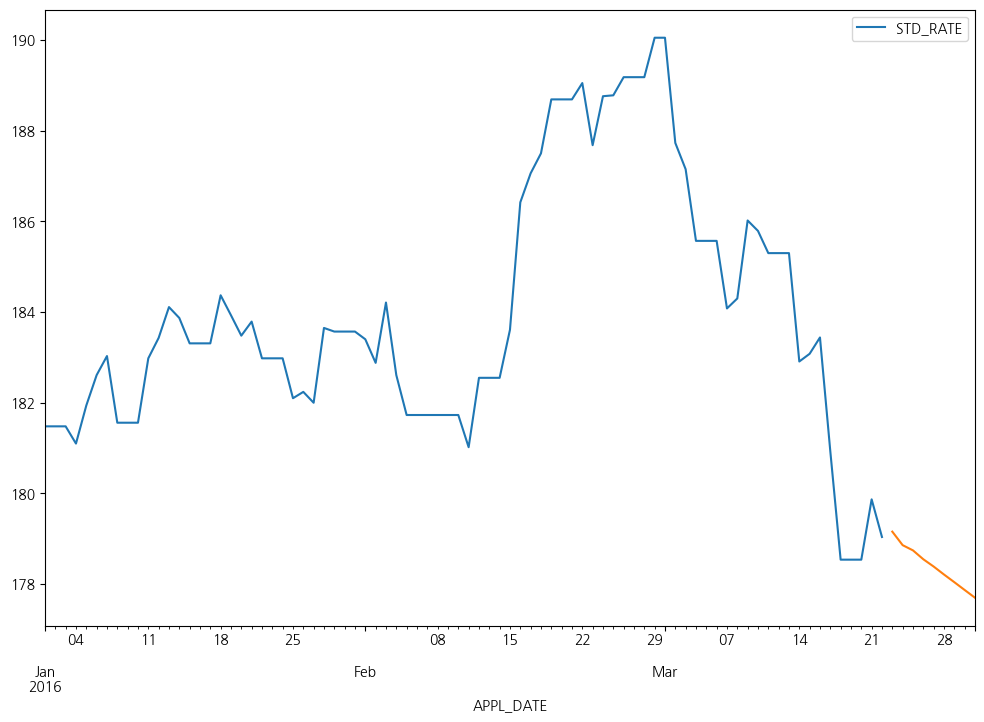

In [91]:
# P241 연습
# 예측 및 결과 해석

# 예측 시작 / 종료 날짜 지정
start_time = df_CNY_test.index.min() # 2016-03-23
end_time = df_CNY_test.index.max() #2016-03-31
fig, ax = plt.subplots(figsize = (12, 8))

# 예측 전까지 데이터
ax = df_CNY_train.plot(ax = ax)

# 예측 그래프 생성 함수, start : 예측 시작, end : 예측 종료, plot_insample : 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_cny.predict(start = start_time, end = end_time, ax = ax, plot_insample = False).plot()

# 2016년 3월 23일 ~ 31일까지의 예측값 -> 지속적으로 감소할 것으로 예측

In [92]:
# p242 연습
# 예측 및 결과 해석

# 전체 기간의 실제값, 예측값 확인
start_time = pd.to_datetime("2016-01-03") # 차분=2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_CNY # 실제값 저장
df_merge["예측값"] = y_pred # 예측값 저장 및 변수명 지정
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886777


<Axes: xlabel='APPL_DATE'>

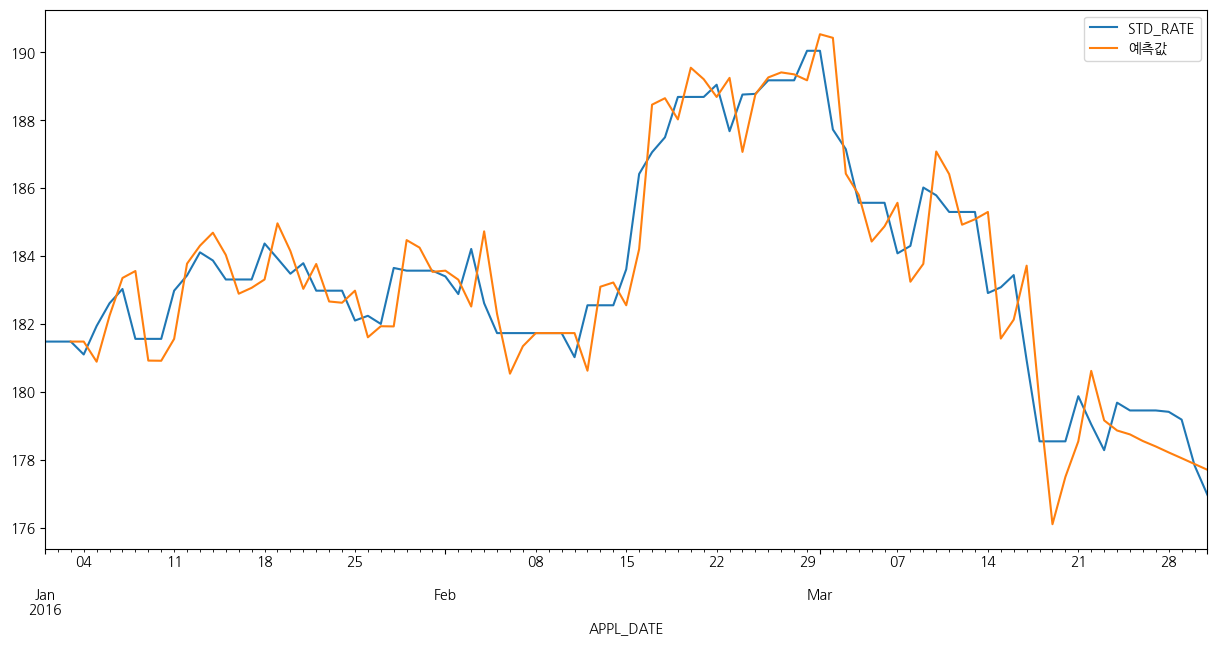

In [93]:
# p242 연습
# 추세 그래프 생성 및 확인
df_merge.plot(y=["STD_RATE", "예측값"], figsize=(15,7))

# 모델 훈련구간은 실제값 대비 지연(lag) 현상이 확인되며 예측 구간은 오차가 큼

In [94]:
# p243 연습
# (ARIMA 모수(p, d, q) 도출을 Grid_search지원 패키지 auto_arima 적용시)

# 시계열 분석 - 시계열 모델

# 최적의 모수(p, q) 찾기 위한 auto_arima 적용
ts_model = auto_arima(df_CNY_train, max_p = 3, max_q = 3, d = 2, trace = True, error_action = 'ignore')

# 최적의 모수 ARIMA(0, 2, 1) 확인

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=228.840, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.705, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.025, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=223.626, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=225.299, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=225.249, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=226.997, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.553 seconds


In [95]:
# p244 연습

# Train 데이터 이용. AR(0), I(2, 차분), MA(1)인 ARIMA 모델
ts_model_cny = ARIMA(df_CNY_train, order = (0, 2, 1)) # (p, d, q) 지정

# 데이터 적합
ts_result_cny = ts_model_cny.fit()
print(ts_result_cny.summary())

# ARIMA(0, 2, 1) 모델의 계수 유의성 확인

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -109.813
Date:                Thu, 08 Aug 2024   AIC                            223.626
Time:                        00:49:06   BIC                            228.390
Sample:                    01-01-2016   HQIC                           225.536
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9327      0.046    -20.235      0.000      -1.023      -0.842
sigma2         0.8886      0.112      7.904      0.000       0.668       1.109
Ljung-Box (L1) (Q):                   0.15   Jarque-

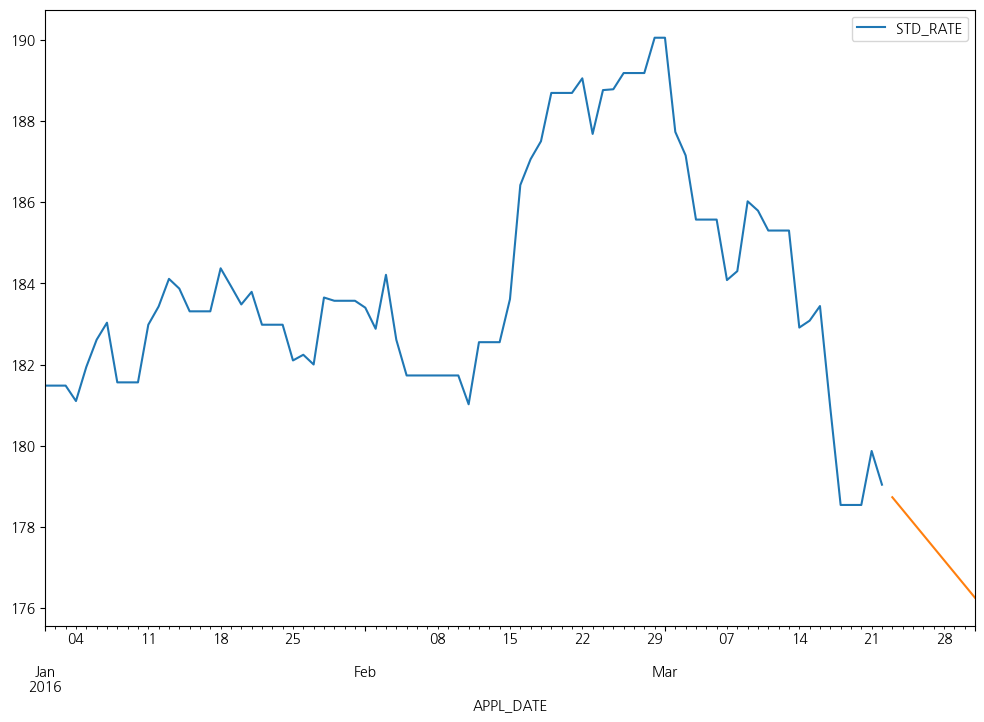

In [96]:
# p245 연습
# 예측 및 결과 해석

# 예측 시작 / 종료 날짜 지정
start_time = df_CNY_test.index.min() # 2016-03-23
end_time = df_CNY_test.index.max() # 2016-03-31
fig, ax = plt.subplots(figsize = (12, 8))

# 예측 전까지 데이터
ax = df_CNY_train.plot(ax = ax)

# 예측 그래프 생성 함수, start : 예측 시작, end : 예측 종료, plot_insample : 가지고 있는 데이터 중 예측 구간과 겹치는 구간 표시
fig = ts_result_cny.predict(start = start_time, end = end_time, ax = ax, plot_insample = False).plot()

# 2016년 3월 23일 ~ 31일까지의 예측값 -> 지속적으로 감소할 것으로 예측

In [98]:
# p246 연습

# 전체 기간의 실제값, 예측값 확인
start_time = pd.to_datetime("2016-01-03") # 차분 = 2 -> 시작일자 + 2 이후부터 예측값 생성됨
y_pred = ts_result_cny.predict(start = start_time, end = end_time, typ = 'levels')
df_merge = df_CNY # 실제값 저장
df_merge["예측값"] = y_pred # 예측값 저장 및 변수명 지정
df_merge.head()

# 모델 훈련구간은 실제값 대비 지연(lag) 현상이 확인되며 예측 구간은 오차가 큼

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480150
2016-01-04,181.10,181.480075
2016-01-05,181.94,180.972362


<Axes: xlabel='APPL_DATE'>

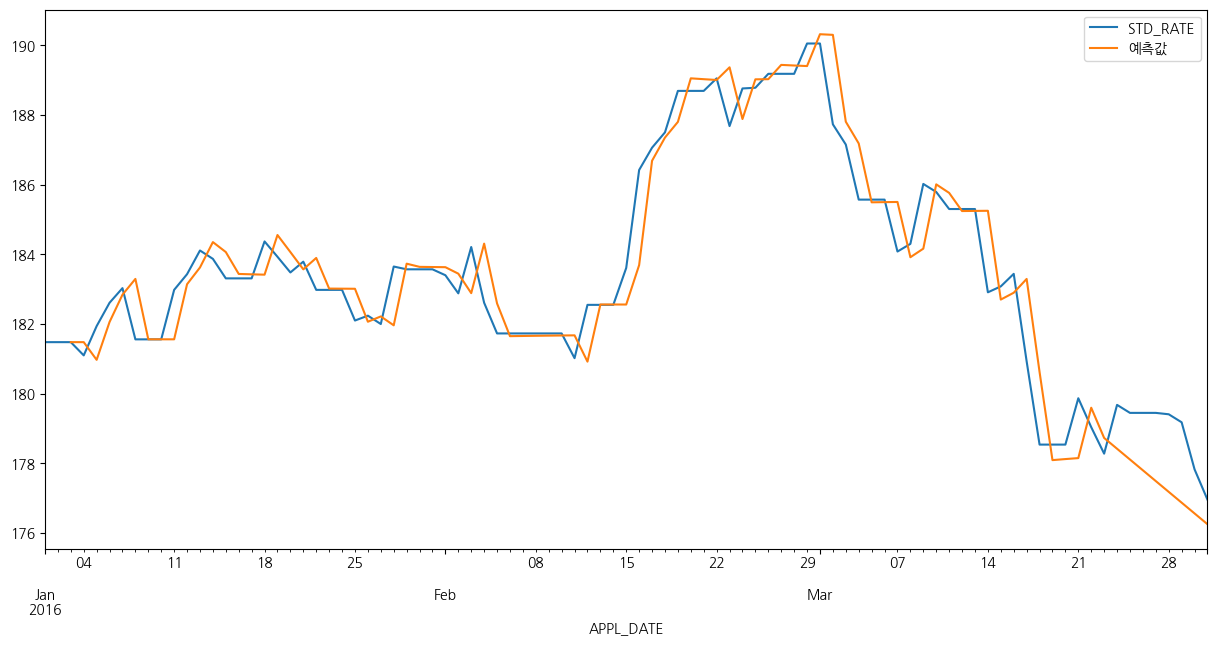

In [99]:
# p246 연습

# 추세 그래프 생성 및 확인
df_merge.plot(y=["STD_RATE", "예측값"], figsize = (15, 7))

In [ ]:
# p247 실습
# 연습에서 생성한 미국 달러 데이터(df_USD)를 이용하여 달러(USD)의 변화 추세를 확인하고 시계열 분석을 이용하여
# 미래의 환율 변동을 확인하시오
# 데이터 : df_USD

# 1. 데이터 구성하기
# 2. 변동 추세 확인
# 3. 시계열 분석 - 정상성 확인 / 자기상관성 확인
# 4. 예측 및 결과 해석
